<a href="https://colab.research.google.com/github/roboy88/PROJECT-GREENLIGHT---Term-Life-Insurance-Conversion-Prediction/blob/main/Term_Life_Insurance_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving dataset.csv to dataset.csv
=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.63      0.42      0.50      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043

=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.64      0.33      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.89      9043

Random Forest Confusion Matrix:
[[7729  256]
 [ 615  443]]
Logistic Regression Confusion Matrix:
[[7790  195]
 [ 706  352]]


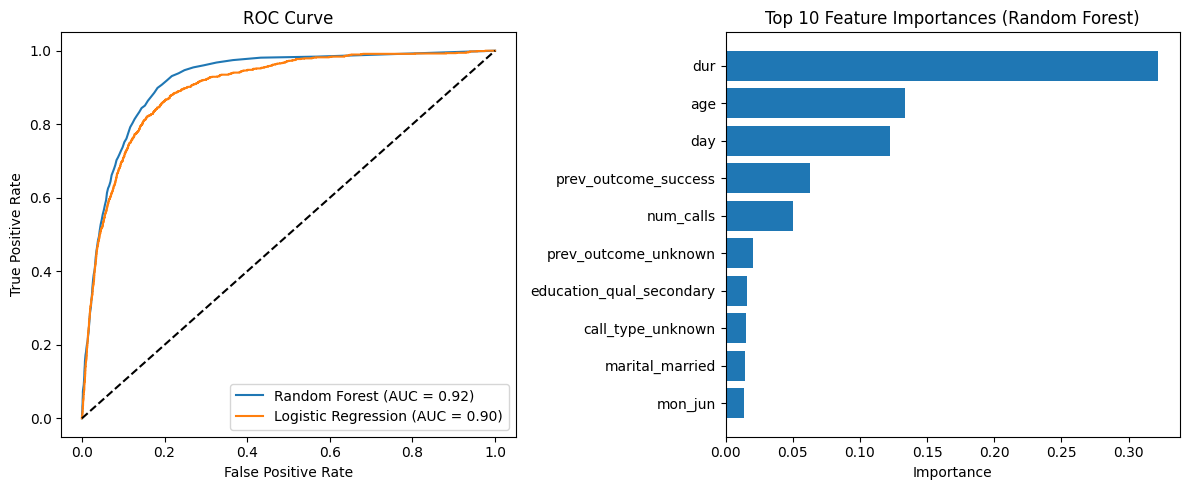

In [1]:
# - Term Life Insurance Conversion Prediction

# === STEP 1: SETUP ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# === STEP 2: LOAD DATA ===
from google.colab import files
uploaded = files.upload()

# Make sure your file is named 'dataset.csv'
df = pd.read_csv("dataset.csv")
df.head()

# === STEP 3: PREPROCESSING ===
df["y"] = df["y"].map({"yes": 1, "no": 0})

# Encode categorical variables
categorical_cols = ["job", "marital", "education_qual", "call_type", "mon", "prev_outcome"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === STEP 4: TRAIN-TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# === STEP 5: MODEL TRAINING ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000)

rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# === STEP 6: EVALUATION ===
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

rf_probs = rf_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Classification reports
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_pred))

print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, lr_pred))

# Confusion matrices
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

# === STEP 7: VISUALIZATION ===

# Plot ROC Curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, rf_probs):.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, lr_probs):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Feature Importance
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:][::-1]

plt.subplot(1, 2, 2)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
